In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from datetime import datetime
from scipy.stats import normaltest
%matplotlib inline

In [ ]:
# Mount drive to access date
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [ ]:
%cd /drive/My\ Drive/Assignment_Time_series/Assignment_Time_series

/drive/.shortcut-targets-by-id/1FVMKxlOqgKRT3dvJpM9eUkKYTnHYUwja/Assignment_Time_series/Assignment_Time_series


In [ ]:
# Read data
state_list = ["MP","Rajasthan1","Tamil Nadu","Andhra Pradesh"]
data = {}
for state in state_list:
    data[state] = []

def last_8_char(x):
  return x[-8:]    
for state in state_list:
    for file in sorted(os.listdir(state), key=last_8_char):
        data_temp = pd.read_csv(state+'/'+file, skiprows=2, 
                     parse_dates={'date_time': ['Year','Month','Day','Hour']}, 
                     date_parser=lambda x: datetime.strptime(x, '%Y %m %d %H'))
        data_temp = data_temp[(data_temp['date_time'].dt.hour >=8) & (data_temp['date_time'].dt.hour <=16)]
        # Taking only 4 evenly spaced data points, uncomment above line and comment line below to take all data into account
        # data_temp = data_temp[data_temp['date_time'].dt.hour.isin([9,11,13,15])]

        data[state].extend(data_temp.values) 

In [ ]:
col_name = ['date_time','Minute','DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Snow depth','Wind Speed','NAN']
MP_data = pd.DataFrame(data['MP'],columns=col_name)
# MP_data = MP_data.drop(labels='NAN', axis=1)
MP_data = MP_data[MP_data['GHI'].notna()]
MP_data.name = 'MP'
MP_data.head(10)

,date_time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow depth,Wind Speed,NAN
0,2000-01-01 08:00:00,0,149,375,268,121,465,268,9,16.043264,969.206482,65.736004,71.561409,0,1.404870,NaN
1,2000-01-01 09:00:00,0,162,611,455,160,617,456,9,20.477919,969.256287,48.926508,61.406733,0,1.177964,NaN
2,2000-01-01 10:00:00,0,183,698,600,183,698,600,9,23.532446,969.059021,41.357676,53.319769,0,0.574517,NaN
3,2000-01-01 11:00:00,0,194,735,682,194,735,682,9,25.100303,968.150452,37.809076,48.357745,0,0.293565,NaN
4,2000-01-01 12:00:00,0,195,740,695,195,740,695,9,25.644234,967.158325,36.318170,47.514574,0,0.457926,NaN
5,2000-01-01 13:00:00,0,188,714,637,188,714,637,9,25.414283,966.396484,36.261497,50.995718,0,0.626590,NaN
6,2000-01-01 14:00:00,0,170,650,515,170,650,515,9,24.456031,965.862549,37.480632,58.025734,0,0.898525,NaN
7,2000-01-01 15:00:00,0,138,530,341,138,530,341,9,22.709661,966.012390,42.444601,67.500131,0,1.375460,NaN
8,2000-01-01 16:00:00,0,94,205,135,82,307,143,10,19.482297,966.293945,55.230587,78.532527,0,2.145357,NaN
9,2000-01-02 08:00:00,0,148,374,267,121,468,269,8,16.042273,970.506714,62.628500,71.598231,0,1.116331,NaN


In [ ]:
MP_data.shape

(49275, 16)

In [ ]:
TamilNadu_data = pd.DataFrame(data['Tamil Nadu'],columns=col_name)
# TamilNadu_data = TamilNadu_data.drop(labels='NAN', axis=1)
TamilNadu_data = TamilNadu_data[TamilNadu_data['GHI'].notna()]
TamilNadu_data.name = 'Tamil Nadu'
TamilNadu_data.head()

,date_time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow depth,Wind Speed,NAN
0,2000-01-01 08:00:00,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,0.716501,NaN
1,2000-01-01 09:00:00,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,0.776021,NaN
2,2000-01-01 10:00:00,0,228,630,692,159,804,751,17,25.217761,952.739014,61.667143,42.592118,0,0.819869,NaN
3,2000-01-01 11:00:00,0,177,821,851,167,837,854,17,25.983396,951.830444,59.480310,34.901158,0,0.824011,NaN
4,2000-01-01 12:00:00,0,171,816,860,169,845,882,17,26.406886,950.518311,58.353354,32.445055,0,0.811820,NaN


In [ ]:
TamilNadu_data.shape

(49275, 16)

In [ ]:
Rajasthan_data = pd.DataFrame(data['Rajasthan1'],columns=col_name)
# Rajasthan_data = Rajasthan_data.drop(labels='NAN', axis=1)
Rajasthan_data = Rajasthan_data[Rajasthan_data['GHI'].notna()]
Rajasthan_data.name = 'Rajasthan'
Rajasthan_data.head()

,date_time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow depth,Wind Speed,NAN
0,2000-01-01 08:00:00,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,3.323988,NaN
1,2000-01-01 09:00:00,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2.818877,NaN
2,2000-01-01 10:00:00,0,144,681,488,147,721,512,-4,21.872848,986.979065,16.310936,59.670536,0,2.604525,NaN
3,2000-01-01 11:00:00,0,151,759,608,162,782,633,-2,26.036963,986.390442,14.891855,53.040145,0,2.763721,NaN
4,2000-01-01 12:00:00,0,156,788,664,168,805,687,-2,28.260238,985.398315,13.308055,49.861770,0,2.677435,NaN


In [ ]:
col_name = ['date_time','Minute','DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Wind Speed','NAN']
AP_data = pd.DataFrame(data['Andhra Pradesh'],columns=col_name)
# AP_data = AP_data.drop(labels='NAN', axis=1)
AP_data = AP_data[AP_data['GHI'].notna()]
AP_data.name = 'Andhra Pradesh'
AP_data.head()

,date_time,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,NAN
0,2000-01-01 08:00:00,0,110,602,333,110,602,333,14,18.137191,942.006470,80.201618,68.258226,2.482057,NaN
1,2000-01-01 09:00:00,0,138,740,547,138,740,547,14,21.422234,941.736328,66.567218,56.554706,2.902531,NaN
2,2000-01-01 10:00:00,0,155,812,714,155,812,714,14,23.382713,941.219055,58.555843,46.546520,2.866336,NaN
3,2000-01-01 11:00:00,0,164,847,818,164,847,818,14,24.719346,940.310425,53.863563,39.556979,2.829693,NaN
4,2000-01-01 12:00:00,0,261,674,797,167,855,847,14,25.476261,938.998352,51.624979,37.330650,2.829407,NaN


In [ ]:
AP_data['GHI'].describe()

count    49275.000000
mean       623.366900
std        230.797025
min          0.000000
25%        432.000000
50%        644.000000
75%        822.000000
max       1055.000000
Name: GHI, dtype: float64

In [ ]:
AP_data['DHI'].describe()

count    49275.000000
mean       229.875677
std         83.114198
min          0.000000
25%        170.000000
50%        212.000000
75%        274.000000
max        904.000000
Name: DHI, dtype: float64

In [ ]:
AP_data['DNI'].describe()

count    49275.000000
mean       522.960284
std        257.188347
min          0.000000
25%        335.500000
50%        599.000000
75%        731.000000
max       1014.000000
Name: DNI, dtype: float64

# Normality check

(array([ 298., 1420., 3616., 6350., 6209., 5749., 7450., 7875., 7059.,
        3249.]),
 array([   0. ,  105.5,  211. ,  316.5,  422. ,  527.5,  633. ,  738.5,
         844. ,  949.5, 1055. ]),
 <a list of 10 Patch objects>)

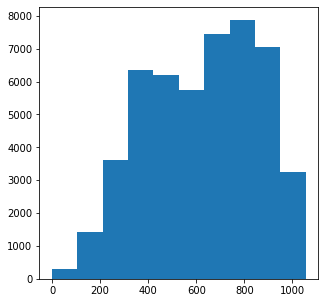

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(AP_data['GHI'])

In [ ]:
def is_normal(df):
	print('Test for state: ' + df.name)
	stat, p = normaltest(df['GHI'])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0\n\n)')
	else:
		print('Sample does not look Gaussian (reject H0)\n\n')
is_normal(AP_data)
is_normal(MP_data)
is_normal(Rajasthan_data)
is_normal(TamilNadu_data)


Test for state: Andhra Pradesh
Statistics=10043.592, p=0.000
Sample does not look Gaussian (reject H0)


Test for state: MP
Statistics=8736.347, p=0.000
Sample does not look Gaussian (reject H0)


Test for state: Rajasthan
Statistics=5378.847, p=0.000
Sample does not look Gaussian (reject H0)


Test for state: Tamil Nadu
Statistics=12330.259, p=0.000
Sample does not look Gaussian (reject H0)




# Feature Correlation HeatMap

In [ ]:
#ignoring dewpoint as its value is just around 937 to 940 for every hour
#solar zenith angle and Wind speed also doesnot seem useful 
AP_data_attribute = AP_data[['DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Temperature','Relative Humidity']]
AP_var_correlation = np.corrcoef(AP_data_attribute.T)
AP_var_correlation

In [ ]:
dfs = [AP_data , MP_data, Rajasthan_data , TamilNadu_data]
for df in dfs:
  df_attributes = df[['DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Temperature','Relative Humidity']]
  corr = df_attributes.corr() # We already examined correlations , drawing a visual plot for the same
  plt.figure(figsize=(10, 8))
  ax = plt.axes()
  ax.set_title('Feature-Feature correlation matrix: ' + str(df.name))
  sns.heatmap(corr, 
              cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
              annot=True, annot_kws={"size": 8}, square=True);

Highly correlated attributes

*  DNI and GHI correlation are 0.7487
*  Clearsky GHI and GHI correlation 0.812
*  Clearsky GHI and Clearsky DNI correlation 0.8216
*  Relative humidity and Temperature correlation -0.855.



# Stationarity Check

In [ ]:
# Now check the data for stationarity by performing the augmented Dickey-Fuller Test.
def stationary_stat_city(test_data):
    print ('Test Statistic: ' + str(test_data[0]))
    print ('P value: ' + str(test_data[1]))
    print ('Number of Observations: '+ str(test_data[3]))
    print ('Critical Value 1%: '+ str(test_data[4]['1%']))
    print ('Critical Value 5%: '+ str(test_data[4]['5%']))
    print ('Critical Value 10%: '+ str(test_data[4]['10%']))
states = [MP_data, AP_data, TamilNadu_data, Rajasthan_data]
for state in states:
  print("Checking if series stationary for state: " + state.name)
  stationary_stat_city(adfuller(state['GHI']))
  print('\n')


Checking if series stationary for state: MP
Test Statistic: -13.906234592544378
P value: 5.616335964627187e-26
Number of Observations: 49218
Critical Value 1%: -3.4304828709229724
Critical Value 5%: -2.8615987261985856
Critical Value 10%: -2.566801258016836


Checking if series stationary for state: Andhra Pradesh
Test Statistic: -16.01846079408184
P value: 6.242689338677383e-29
Number of Observations: 49217
Critical Value 1%: -3.4304828736228092
Critical Value 5%: -2.8615987273918306
Critical Value 10%: -2.566801258651965


Checking if series stationary for state: Tamil Nadu
Test Statistic: -17.989265821866095
P value: 2.757893247341827e-30
Number of Observations: 49217
Critical Value 1%: -3.4304828736228092
Critical Value 5%: -2.8615987273918306
Critical Value 10%: -2.566801258651965


Checking if series stationary for state: Rajasthan
Test Statistic: -8.82429870402549
P value: 1.8412993337678153e-14
Number of Observations: 49218
Critical Value 1%: -3.4304828709229724
Critical Value 

It is seen that the value of test statistic is greater (more negative) than the 1% critical values for each of the selected studies. Thus, we can reject the null hyothesis of a unit root being present in the data set and we can conclude with more than 99% confidence that this is a stationary series.

In [ ]:
# Check the same with a non parametric test called KPSS 
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'KPSS Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(AP_data['GHI'])
kpss_test(TamilNadu_data['GHI'])
kpss_test(MP_data['GHI'])
kpss_test(Rajasthan_data['GHI'])

# Finding Distribution Of Data

In [ ]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
# Create models from data
bins = 1000
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    # dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']
    # DISTRIBUTIONS = [getattr(scipy.stats, dist_name) for x in dist_names]
    # DISTRIBUTIONS = [        
    #     st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    #     st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    #     st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk
    # ]
    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    for distribution in DISTRIBUTIONS:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                params = distribution.fit(data)
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=100):
    """Generate distributions's Probability Distribution Function """
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)
    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)
    return pdf

# # Plot for comparison
plt.figure(figsize=(12,8))
AP_data_yr_2000 = AP_data[(AP_data['date_time'].dt.year).isin([2000])]
# AP_data_yr_2000 = AP_data[(AP_data['date_time'].dt.year).isin([2000,2001,2002]) & (AP_data['date_time'].dt.hour).isin([12])]
# AP_data
data = AP_data_yr_2000['GHI']
ax = data.plot(kind='hist', density = True, bins=bins, alpha=0.5)
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, bins, ax)
best_dist = getattr(st, best_fit_name)
print(best_fit_name + " : This is approx distribution")
# Update plots
ax.set_ylim(dataYLim)
ax.set_xlabel(u'GHI')
ax.set_ylabel('freq')
print(best_fit_name)
# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(label='PDF', legend=True)
data.plot(kind='hist', density = True,bins=bins,alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_ylim(dataYLim)
ax.set_xlabel(u'GHI')
ax.set_ylabel('freq')

## TODO
#### 1. Drop only NaN from GHI because we are using only that column, drop / fillna----------- Done dropped - No null values were found though, still processed wrt GHI column

#### 2. Handle outliers if any

# Time Series Decomposition

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


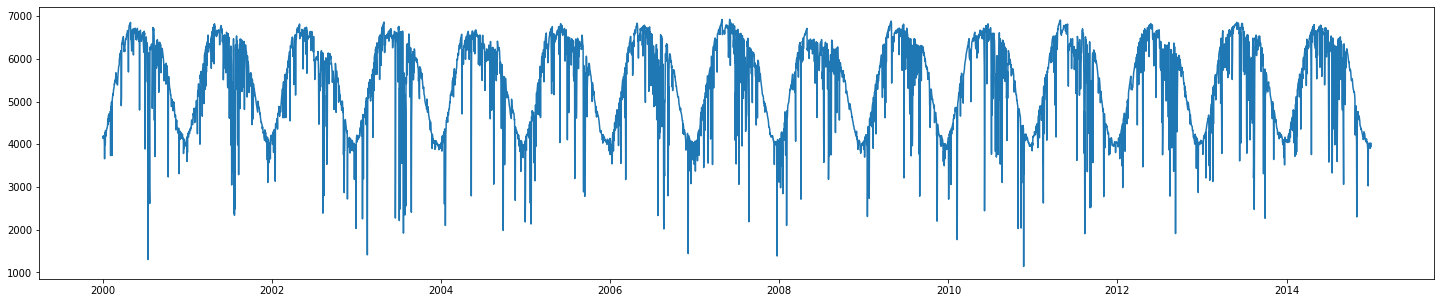

In [ ]:
# Aggregate data to daily values to remove hourly variations
data = [Rajasthan_data['date_time'],Rajasthan_data['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
daily_AP = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
# monthly_AP = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
daily_AP.set_index('date_time')
# monthly_AP.set_index('date_time')
plt.rcParams["figure.figsize"] = (25,5)

daily_AP['GHI'][903] = (daily_AP['GHI'][902]+daily_AP['GHI'][904])/2
plt.plot(daily_AP['date_time'],daily_AP['GHI'])
# plt.plot(monthly_AP['date_time'],monthly_AP['GHI'])

In [ ]:
data = [AP_data['date_time'],AP_data['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
daily_Andhra = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
# monthly_AP = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
daily_Andhra.set_index('date_time')

,GHI
date_time,
2000-01-01,5445
2000-01-02,5525
2000-01-03,5017
2000-01-04,5480
2000-01-05,5477
...,...
2014-12-27,5255
2014-12-28,3669
2014-12-29,4777


In [ ]:
data = [MP_data['date_time'],MP_data['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
daily_MP = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
# monthly_AP = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
daily_MP.set_index('date_time')

,GHI
date_time,
2000-01-01,4328
2000-01-02,4358
2000-01-03,4389
2000-01-04,4382
2000-01-05,4387
...,...
2014-12-27,4287
2014-12-28,4295
2014-12-29,4281


In [ ]:
data = [TamilNadu_data['date_time'],TamilNadu_data['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
daily_TN = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
# monthly_AP = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
daily_TN.set_index('date_time')

,GHI
date_time,
2000-01-01,5559
2000-01-02,5793
2000-01-03,3240
2000-01-04,5678
2000-01-05,5633
...,...
2014-12-27,4254
2014-12-28,4433
2014-12-29,5099


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


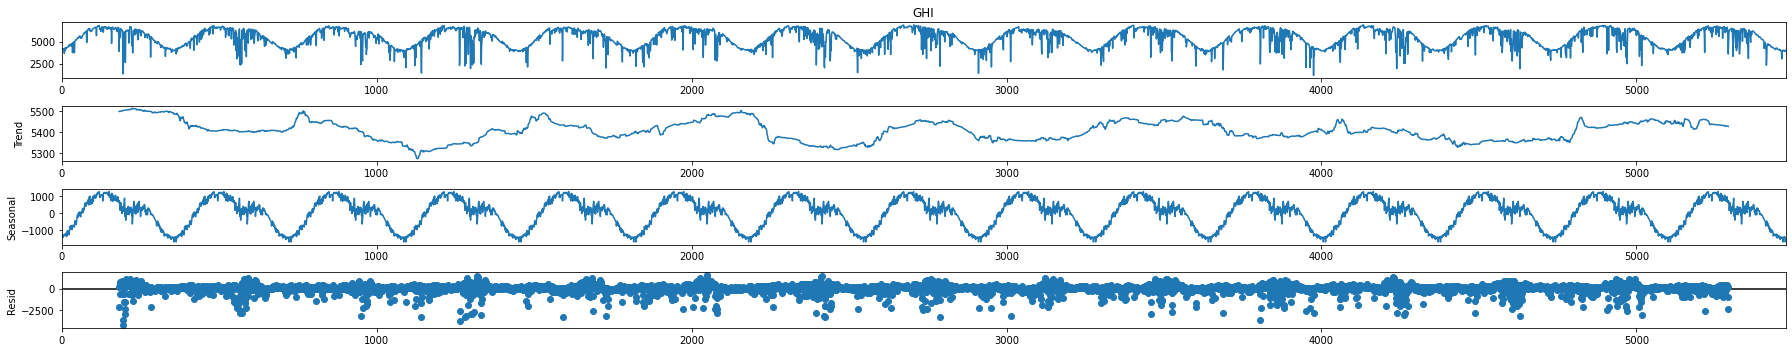

In [ ]:
# Perform Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(daily_AP['GHI'], model='additive',freq=365)
result.plot()
plt.show()


# Prediction 

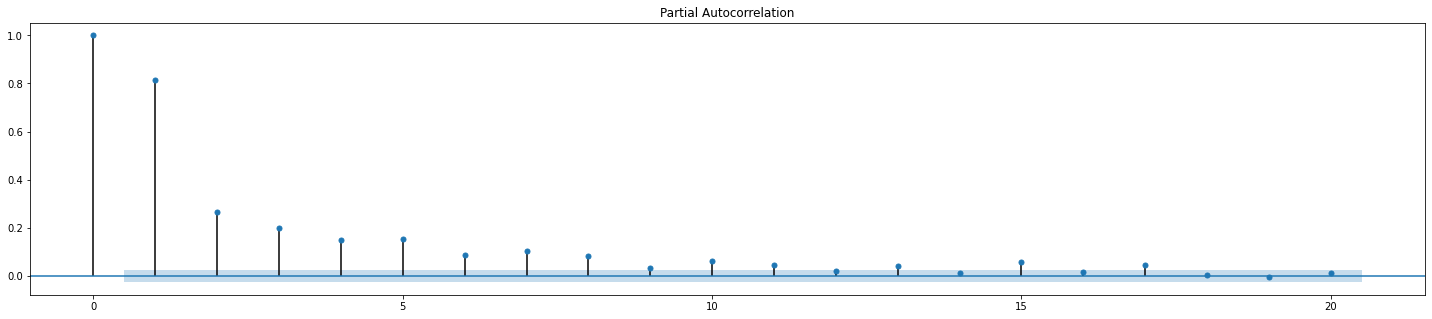

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(daily_AP['GHI'],lags = 20)

In [ ]:
# ! pip install statsmodels==0.12
from statsmodels.tsa.arima.model import ARIMA

The plot above indicates there is a significant correlation up till ~12

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

# AR forecasting
ar_model = ARIMA(daily_AP['GHI'],order=(12,0,0))
ar_fit_model = ar_model.fit()
print(ar_fit_model.summary())
residuals = pd.DataFrame(ar_fit_model.resid)

                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:                ARIMA(12, 0, 0)   Log Likelihood              -42105.134
Date:                Sun, 22 Nov 2020   AIC                          84238.268
Time:                        13:43:27   BIC                          84330.779
Sample:                             0   HQIC                         84270.543
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5410.0550    198.932     27.196      0.000    5020.155    5799.954
ar.L1          0.4527      0.008     58.292      0.000       0.437       0.468
ar.L2          0.0765      0.010      8.002      0.0

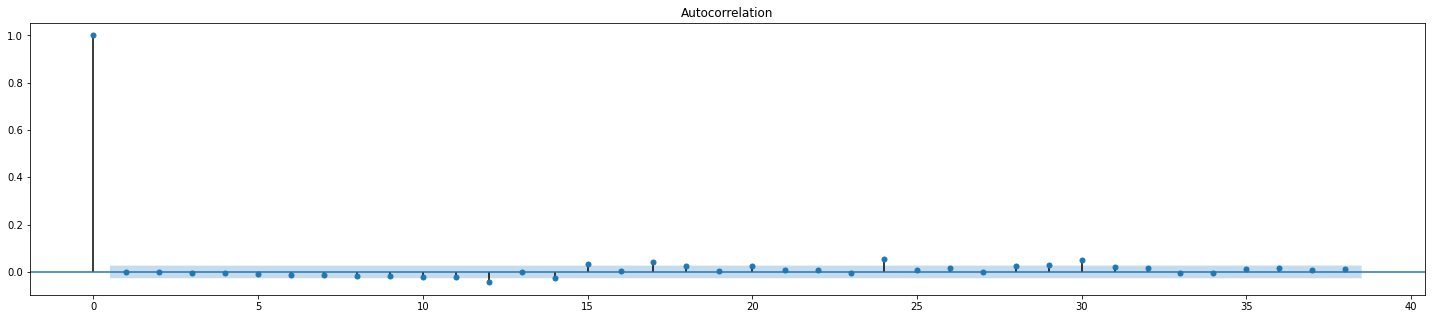

In [ ]:
acf_plot = plot_acf(residuals)

There is no significant correlation between the residuals, so we can assume that they are white noise

In [ ]:
# Finding Forecast Error
percentage = []
for i in range(len(residuals)):
  if (daily_AP['GHI'][i]==0):
    continue
  percentage.append((abs(residuals[0][i])/(daily_AP['GHI'][i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

Mean Absolute Percentage Error: 6.833106306492663 %


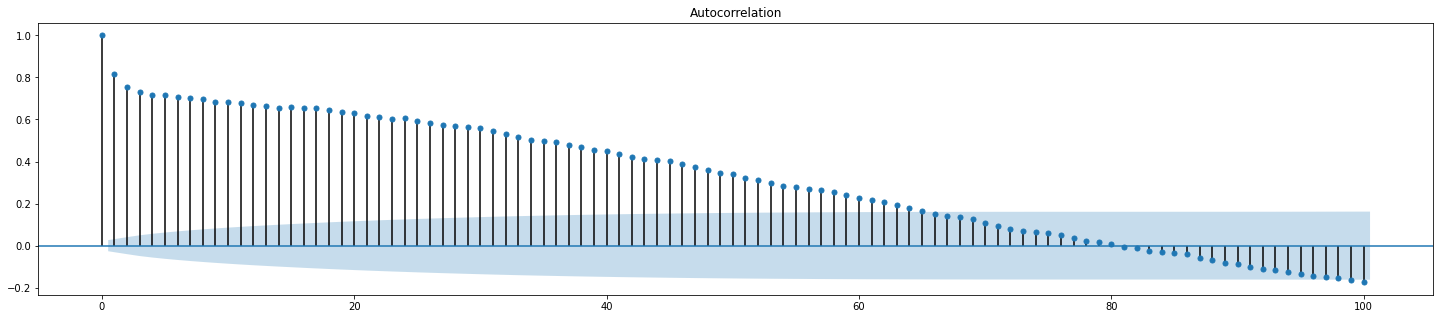

In [ ]:
acf = plot_acf(daily_AP['GHI'],lags = 100)

The ACF plot above shows that the value for q(MA) should be around 60. However, this results in very large training times. We use q=20. (*TODO Try with larger MA and pickle it*)

                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:                ARIMA(0, 0, 30)   Log Likelihood              -42203.151
Date:                Sun, 22 Nov 2020   AIC                          84470.301
Time:                        13:48:17   BIC                          84681.756
Sample:                             0   HQIC                         84544.073
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5409.9888     69.374     77.983      0.000    5274.019    5545.959
ma.L1          0.4893      0.008     59.738      0.000       0.473       0.505
ma.L2          0.3250      0.010     31.049      0.0

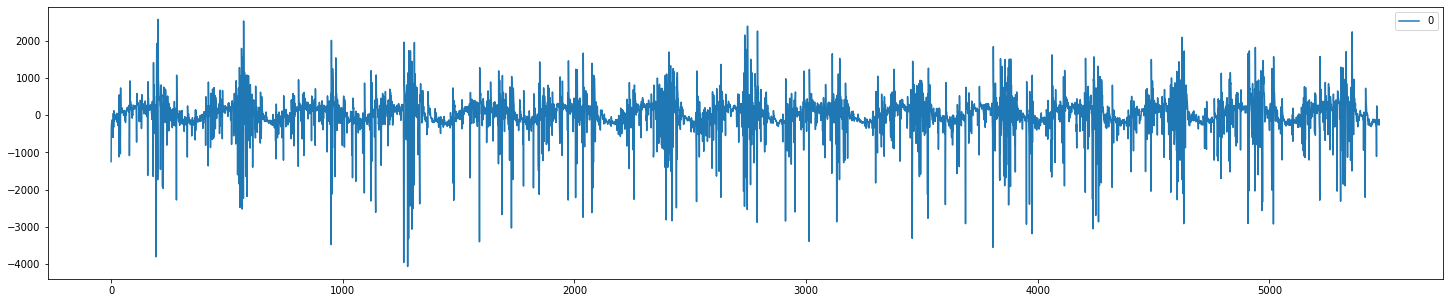

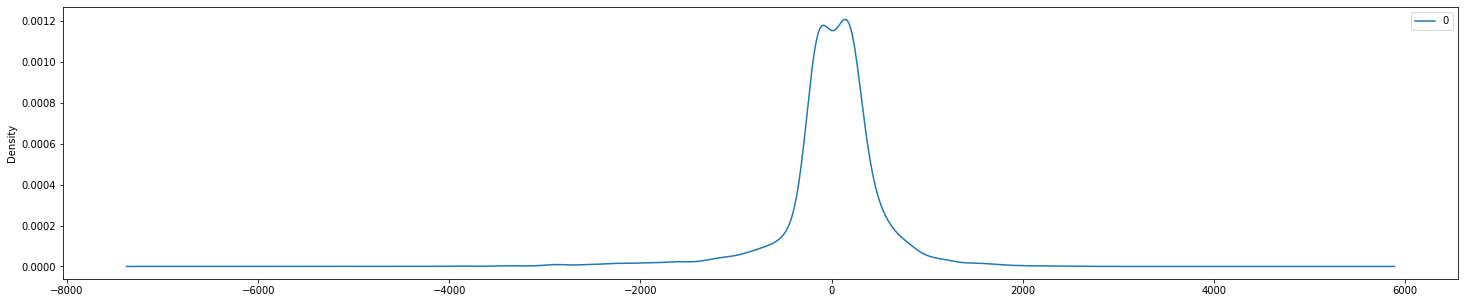

                 0
count  5475.000000
mean     -0.268620
std     538.965676
min   -4061.905607
25%    -162.957063
50%      41.516504
75%     236.364059
max    2572.008877


In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
modelMA = ARIMA(daily_AP['GHI'],order=(0,0,30))
fit_modelMA = modelMA.fit()
print(fit_modelMA.summary())
residualsMA = pd.DataFrame(fit_modelMA.resid)
residualsMA.plot()
plt.show()
residualsMA.plot(kind='kde')
plt.show()
print(residualsMA.describe())

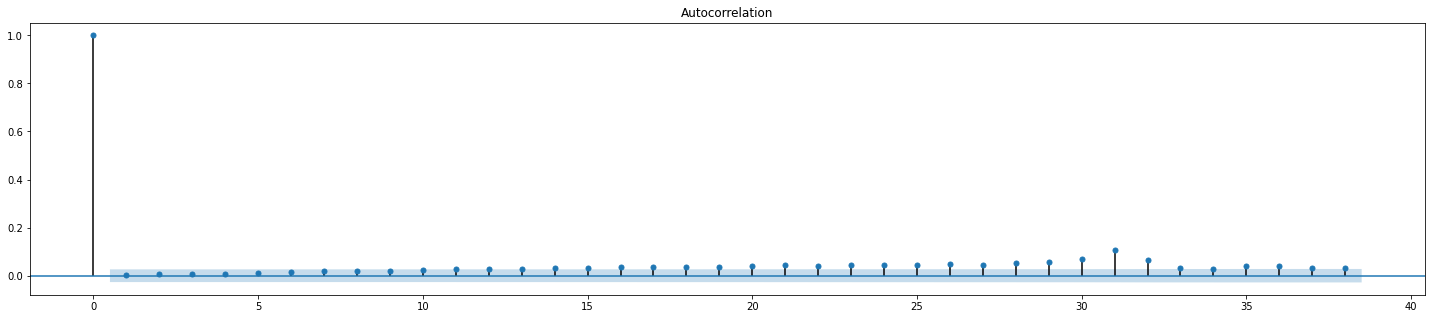

In [ ]:
acf_plot = plot_acf(residualsMA)

We can see there is some correlation within the residuals at large lag. 

In [ ]:
# Finding Forecast Error
percentage = []
for i in range(len(residuals)):
  if daily_AP['GHI'][i]==0:
    continue
  percentage.append((abs(residualsMA[0][i])/(daily_AP['GHI'][i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

Mean Absolute Percentage Error: 7.28334837859698 %


In [ ]:
modelARMA = ARIMA(daily_AP['GHI'],order=(12,0,10))
fit_modelARMA = modelARMA.fit()
print(fit_modelARMA.summary())
residualsARMA = pd.DataFrame(fit_modelARMA.resid)
# residualsARMA.plot()
# plt.show()
# residualsARMA.plot(kind='kde')
# plt.show()
# print(residualsARMA.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:               ARIMA(12, 0, 10)   Log Likelihood              -42055.182
Date:                Sun, 22 Nov 2020   AIC                          84158.364
Time:                        13:54:07   BIC                          84316.955
Sample:                             0   HQIC                         84213.693
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5410.0545    108.191     50.005      0.000    5198.004    5622.105
ar.L1         -0.3004      0.349     -0.860      0.390      -0.985       0.384
ar.L2          0.9996      0.241      4.151      0.0

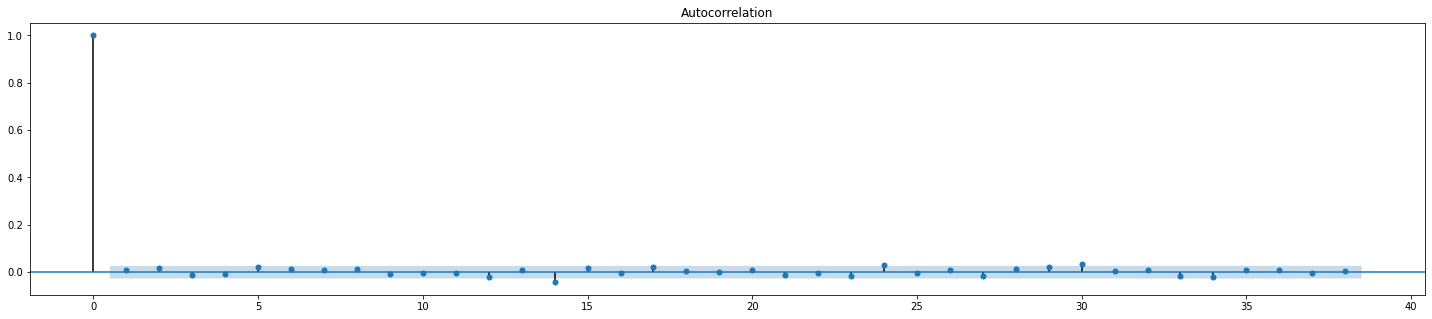

In [ ]:
acf_plot = plot_acf(residualsARMA)


In [ ]:
# Finding Forecast Error
percentage = []
for i in range(len(residualsARMA)):
  if daily_AP['GHI'][i]==0:
    continue
  percentage.append((abs(residualsARMA[0][i])/(daily_AP['GHI'][i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

Mean Absolute Percentage Error: 6.779815910585798 %


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:               ARIMA(12, 1, 10)   Log Likelihood              -42072.340
Date:                Sun, 22 Nov 2020   AIC                          84190.679
Time:                        14:03:48   BIC                          84342.658
Sample:                             0   HQIC                         84243.702
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0945      0.298      0.317      0.751      -0.490       0.679
ar.L2          1.5155      0.303      5.000      0.000       0.921       2.110
ar.L3         -0.6346      0.294     -2.159      0.0

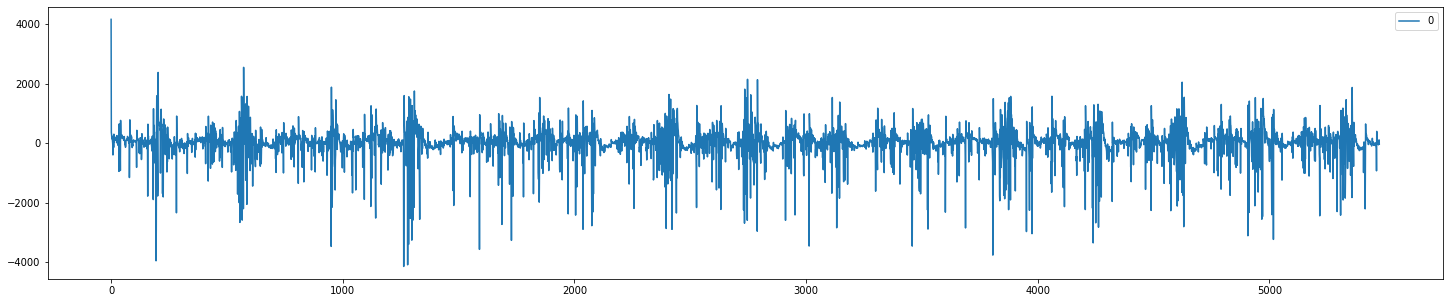

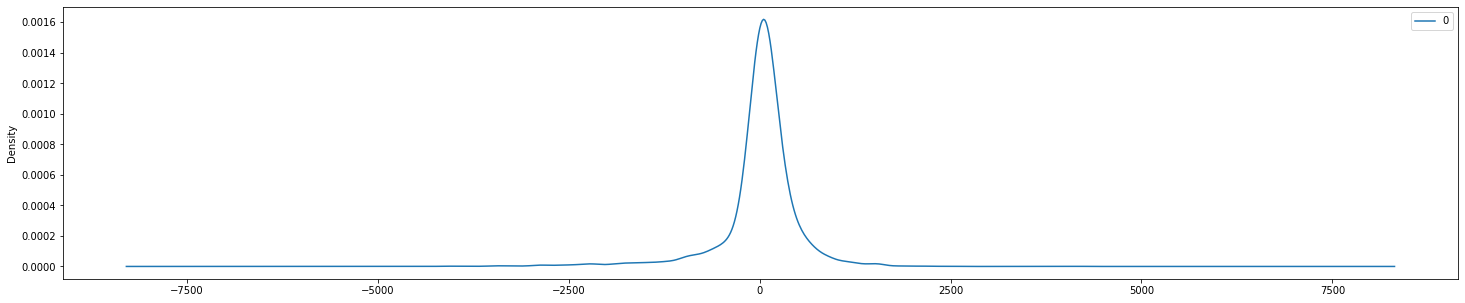

                 0
count  5475.000000
mean      0.782257
std     529.784916
min   -4142.488861
25%    -100.707205
50%      52.474132
75%     206.709524
max    4162.000000


In [ ]:
# d = 1 gave a better fit over the data(MAPE) than d = 2.
modelARIMA = ARIMA(daily_AP['GHI'],order=(12,1,10))
fit_modelARIMA = modelARIMA.fit()
print(fit_modelARIMA.summary())
residualsARIMA = pd.DataFrame(fit_modelARIMA.resid)
residualsARIMA.plot()
plt.show()
residualsARIMA.plot(kind='kde')
plt.show()
print(residualsARIMA.describe())

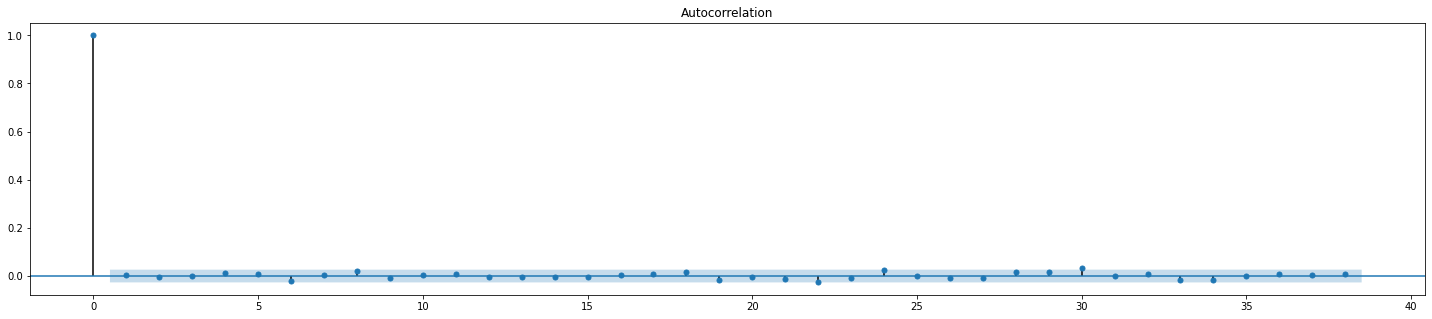

In [ ]:
acf_plot = plot_acf(residualsARIMA)

In [ ]:
# Finding Forecast Error
percentage = []
for i in range(len(residualsARIMA)):
  if daily_AP['GHI'][i]==0:
    continue
  percentage.append((abs(residualsARIMA[0][i])/(daily_AP['GHI'][i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

Mean Absolute Percentage Error: 6.7662635394429165 %


In [ ]:
train_data_len = int((len(daily_AP)*13)/15)
train_data = daily_AP['GHI'][0:train_data_len]
test_data = daily_AP['GHI'][train_data_len:len(daily_AP)]

In [ ]:
# Rolling forecast for AR
history = train_data.copy()

predictions = []
weekly = []
monthly = []
for t in range(len(test_data)):
  modelAR = ARIMA(history,order = (8,0,0))
  model_fit = modelAR.fit()

  if (t)%7==0:
    forecast = model_fit.predict(start=t+train_data_len, end=t+train_data_len+6)
    # print(forecast)
    for i in range(7):
      weekly.append(forecast[train_data_len+t+i])
  
  if (t)%30==0:
    forecast = model_fit.predict(start=t+train_data_len, end=t+train_data_len+29)
    # print(forecast)
    for i in range(30):
      monthly.append(forecast[train_data_len+t+i])

  output = model_fit.forecast()
  predVal = output[train_data_len+t]
  predictions.append(predVal)
  history[len(history)] = test_data[train_data_len+t]

# ar_model = ARIMA(train_data,order=(12,0,0))
# ar_fit_model = ar_model.fit()
# print(ar_fit_model.summary())
# residuals = pd.DataFrame(ar_fit_model.resid)

Mean Absolute Percentage Error: [9.49616628] %
Mean Sqaured Error: 432576.57610139356


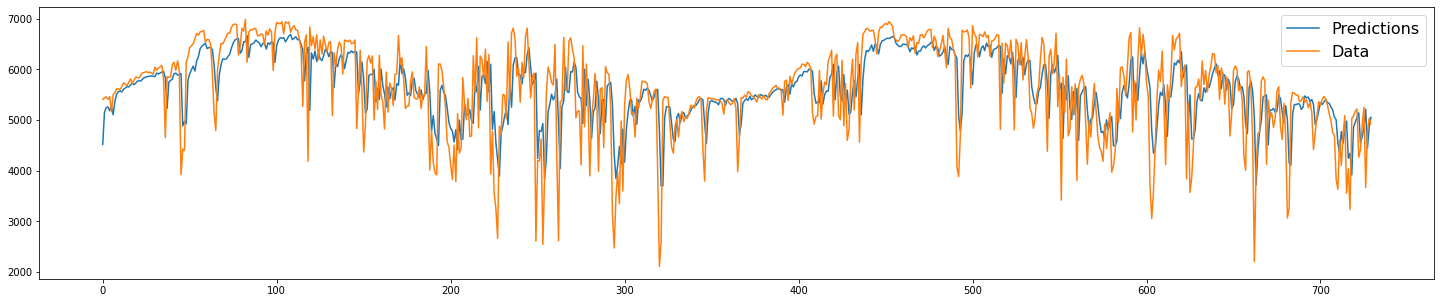

In [ ]:
percentage = []
for i in range(len(predictions)):
  percentage.append((abs(predictions[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,predictions)
print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictions)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

Mean Absolute Percentage Error: 11.579904194750121 %
Mean Sqaured Error: 598628.7114976553


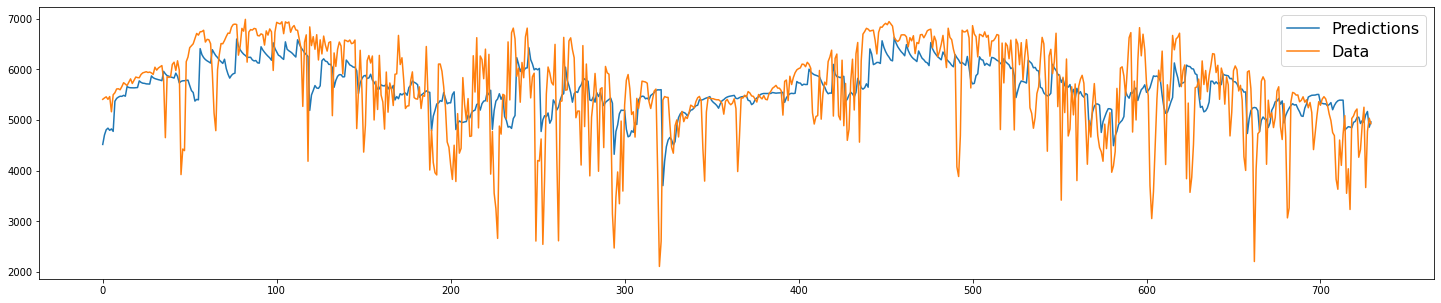

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(weekly[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,weekly[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weekly[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

Mean Absolute Percentage Error: 13.225131685645541 %
Mean Sqaured Error: 721218.8179576535


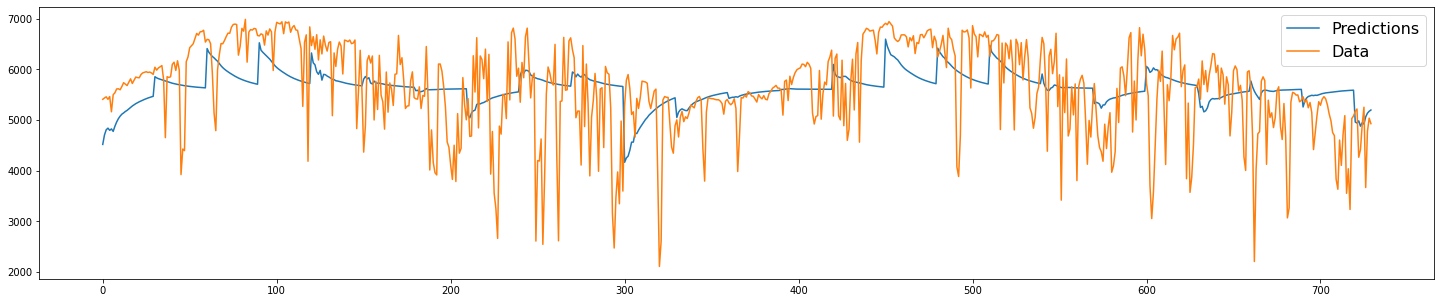

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(monthly[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,monthly[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks.
# plt.plot(monthly[90:120])
# plt.plot(test_points[90:120])

plt.plot(monthly[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
# Rolling forecast for MA
history = daily_AP['GHI']

predictionsMA = []
weeklyMA = []
monthlyMA = []
for t in range(len(test_data)):
  modelMA = ARIMA(history[:train_data_len+t],order = (0,0,8))
  model_fitMA = modelMA.fit()

  if (t)%7==0:
    forecast = model_fitMA.predict(start=t+train_data_len, end=t+train_data_len+6)
    # print(forecast)
    for i in range(7):
      weeklyMA.append(forecast[train_data_len+t+i])
  
  if (t)%30==0:
    forecast = model_fitMA.predict(start=t+train_data_len, end=t+train_data_len+29)
    # print(forecast)
    for i in range(30):
      monthlyMA.append(forecast[train_data_len+t+i])
  
  output = model_fitMA.forecast()
  predVal = output[train_data_len+t]
  predictionsMA.append(predVal)
  # history[len(history)] = test_data[train_data_len+t]

In [ ]:
percentage = []
for i in range(len(predictionsMA)):
  percentage.append((abs(predictionsMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,predictionsMA)
print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictionsMA)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(weeklyMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,weeklyMA[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weeklyMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(monthlyMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,monthlyMA[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks.
# plt.plot(monthly[90:120])
# plt.plot(test_points[90:120])

plt.plot(monthlyMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
# Rolling forecast for ARMA
history = daily_AP['GHI']

predictionsARMA = []
weeklyARMA = []
monthlyARMA = []
for t in range(len(test_data)):
  modelARMA = ARIMA(history[:train_data_len+t],order = (3,0,1))
  model_fitARMA = modelARMA.fit()

  if (t)%7==0:
    forecast = model_fitARMA.predict(start=t+train_data_len, end=t+train_data_len+6)
    # print(forecast)
    for i in range(7):
      weeklyARMA.append(forecast[train_data_len+t+i])
  
  if (t)%30==0:
    forecast = model_fitARMA.predict(start=t+train_data_len, end=t+train_data_len+29)
    # print(forecast)
    for i in range(30):
      monthlyARMA.append(forecast[train_data_len+t+i])

  output = model_fitARMA.forecast()
  predVal = output[train_data_len+t]
  predictionsARMA.append(predVal)
  # history[len(history)] = test_data[train_data_len+t]

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Mean Absolute Percentage Error: 7.064515010907475 %
Mean Sqaured Error: 294691.2217677102


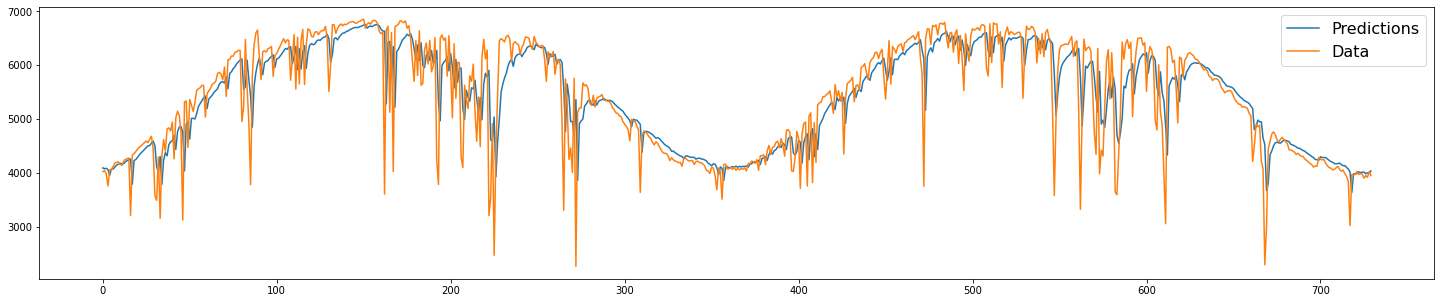

In [ ]:
percentage = []
for i in range(len(predictionsARMA)):
  percentage.append((abs(predictionsARMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,predictionsARMA)
print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictionsARMA)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

Mean Absolute Percentage Error: 8.629517074725852 %
Mean Sqaured Error: 380304.0887596516


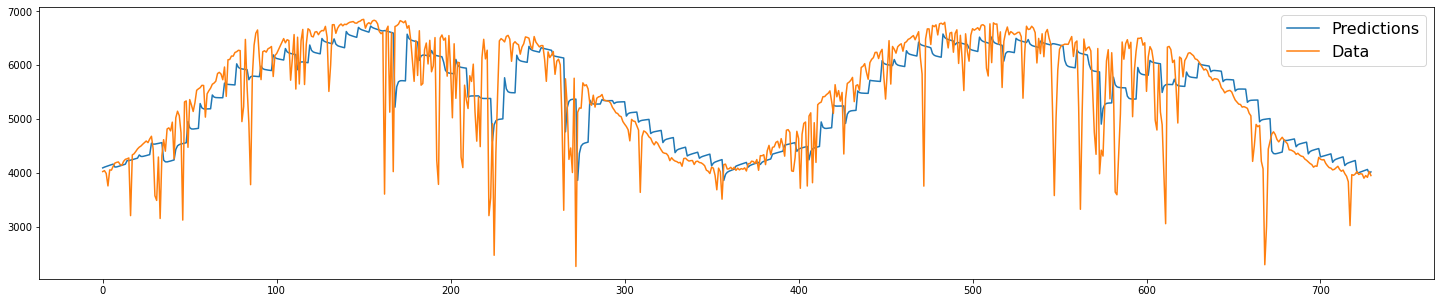

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(weeklyARMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,weeklyARMA[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weeklyARMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

Mean Absolute Percentage Error: 10.228473320994539 %
Mean Sqaured Error: 463154.7840668813


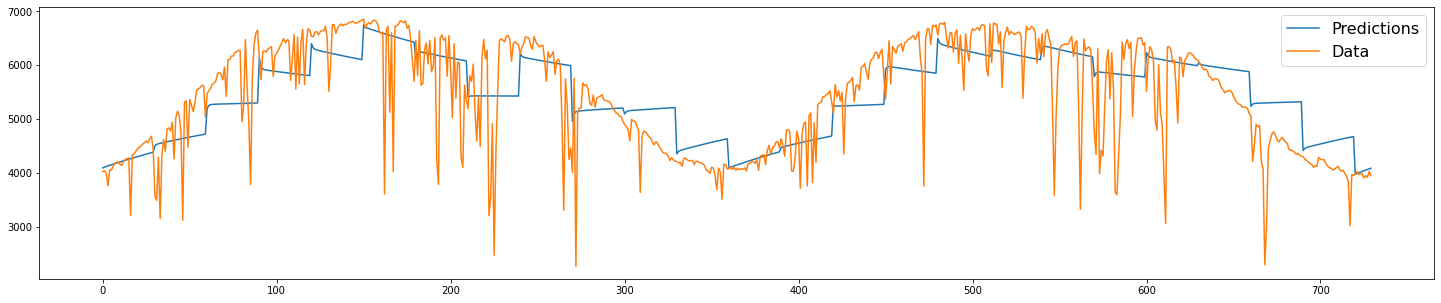

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(monthlyARMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,monthlyARMA[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks.
# plt.plot(monthly[90:120])
# plt.plot(test_points[90:120])

plt.plot(monthlyARMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
# Rolling forecast for ARIMA
history = daily_AP['GHI']

predictionsARIMA = []
weeklyARIMA = []
monthlyARIMA = []
for t in range(len(test_data)):
  modelARIMA = ARIMA(history[:train_data_len+t],order = (4,1,5))
  model_fitARIMA = modelARIMA.fit(disp=0)

  if (t)%7==0:
    forecast = model_fitARIMA.predict(start=t+train_data_len, end=t+train_data_len+6)
    # print(forecast)
    for i in range(7):
      weeklyARIMA.append(forecast[train_data_len+t+i])
  
  if (t)%30==0:
    forecast = model_fitARIMA.predict(start=t+train_data_len, end=t+train_data_len+29)
    # print(forecast)
    for i in range(30):
      monthlyARIMA.append(forecast[train_data_len+t+i])

  output = model_fitARIMA.forecast()
  predVal = output[train_data_len+t]
  predictionsARIMA.append(predVal)
  # history[len(history)] = test_data[train_data_len+t]

Mean Absolute Percentage Error: [9.46295559] %
Mean Sqaured Error: 428254.3143988919


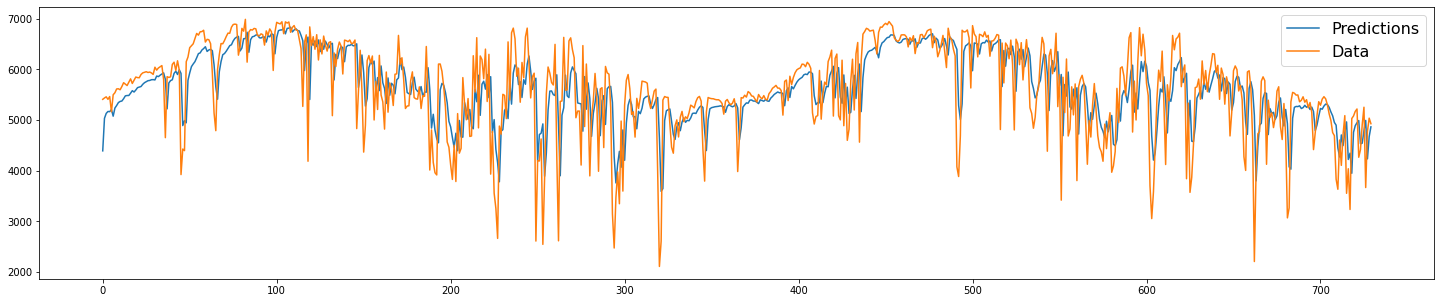

In [ ]:
percentage = []
for i in range(len(predictionsARIMA)):
  percentage.append((abs(predictionsARIMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,predictionsARIMA)
print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictionsARIMA)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(weeklyARIMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,weeklyARIMA[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weeklyARIMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
percentage = []
for i in range(len(test_data)):
  percentage.append((abs(monthlyARIMA[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,monthlyARIMA[:len(test_data)])
print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks.
# plt.plot(monthly[90:120])
# plt.plot(test_points[90:120])

plt.plot(monthlyARIMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:


stationary = result.resid
stationary = stationary[np.logical_not(np.isnan(stationary))]

indices = [x for x in stationary.index]

# for i in indices:
#   stationary[i] = stationary[i] + result.trend[i] + result.seasonal[i]

# plt.plot(stationary)
# plt.plot(daily_AP['GHI'])

# print(stationary)
# print(stationary.index)

train_stat_len = int(len(stationary)*0.8)

train = stationary[:train_stat_len]
train_indices = indices[:train_stat_len]
test = stationary[train_stat_len:]
test_indices = indices[train_stat_len:]

# print(train)
# print(test)

In [ ]:
# Only works for small parameters. Can do rolling estimate for predictions.

modelARMA = ARIMA(train,order=(3,0,1))
fit_modelARMA = modelARMA.fit()
print(fit_modelARMA.summary())
residualsARMA = pd.DataFrame(fit_modelARMA.resid)

4088    150.881113
4089     94.446007
4090     63.528675
4091     43.589727
4092     30.464342
           ...    
5106     -0.307101
5107     -0.307101
5108     -0.307101
5109     -0.307101
5110     -0.307101
Length: 1023, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


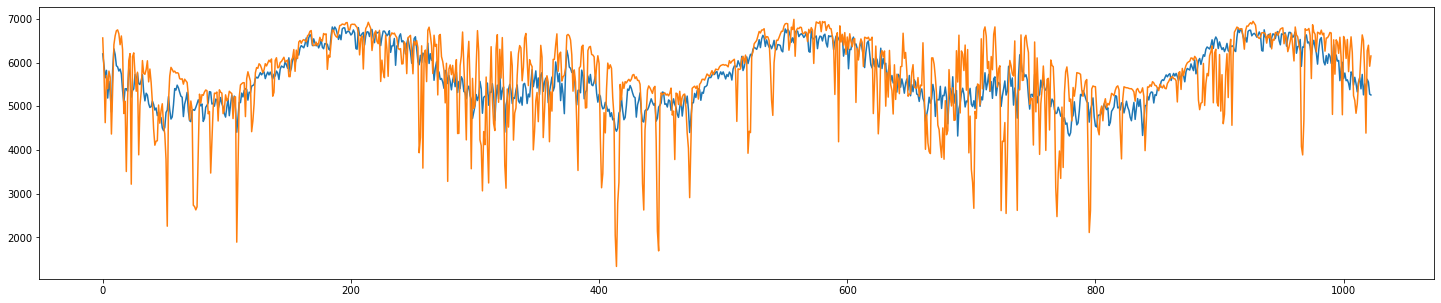

In [ ]:
predictions = fit_modelARMA.predict(start=test_indices[0]-train_indices[0],end=test_indices[-1]-train_indices[0])

print(predictions)

predict_points = []
test_points = []

for i in test_indices:
  predict_points.append(predictions[i-train_indices[0]] + result.trend[i] + result.seasonal[i])
  test_points.append(daily_AP['GHI'][i])

plt.plot(predict_points)
plt.plot(test_points)

5475
                                 Statespace Model Results                                
Dep. Variable:                               GHI   No. Observations:                 5475
Model:             SARIMAX(3, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -43998.009
Date:                           Sun, 22 Nov 2020   AIC                          88010.019
Time:                                   06:19:10   BIC                          88056.274
Sample:                                        0   HQIC                         88026.156
                                          - 5475                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4381      0.010    148.266      0.000       1.419       1.457
ar.L2         -0.3820      0.012    -3

In [ ]:
history = train_data.copy()

predictions = []
for t in range(len(test_data)):
  modelSARIMA = SARIMAX(history,order = (3,0,1),seasonal_order=(1,0,1,1))
  model_fitSARIMA = modelSARIMA.fit(disp=0)
  output = model_fitSARIMA.predict(start=train_data_len+t,stop=train_data_len+t)
  predVal = output[train_data_len+t]
  predictions.append(predVal)
  history[len(history)] = test_data[train_data_len+t]

In [ ]:
percentage = []
for i in range(len(predictions)):
  percentage.append((abs(predictions[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,predictions)
print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictions)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
modelARMA = ARIMA(daily_AP['GHI'],order=(10,0,20),enforce_stationarity=False,enforce_invertibility=False)
fit_modelARMA = modelARMA.fit()
print(fit_modelARMA.summary())
residualsARMA = pd.DataFrame(fit_modelARMA.resid)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:               ARIMA(10, 0, 20)   Log Likelihood              -43775.668
Date:                Sun, 22 Nov 2020   AIC                          87615.335
Time:                        08:22:12   BIC                          87826.667
Sample:                             0   HQIC                         87689.079
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5610.3019     79.821     70.286      0.000    5453.855    5766.749
ar.L1          0.5798      0.818      0.708      0.479      -1.024       2.184
ar.L2          0.2530      1.016      0.249      0.8

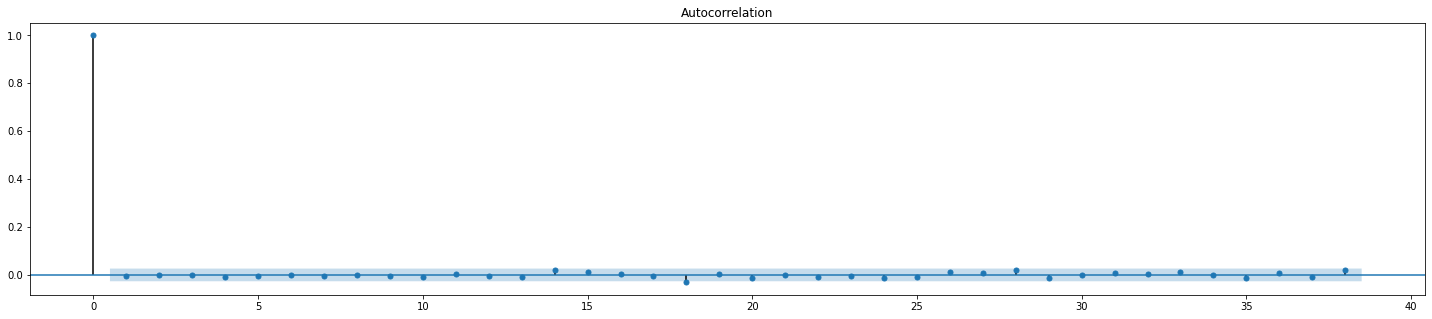

In [ ]:
acf_plot = plot_acf(residualsARMA)

In [ ]:
history = train_data.copy()

predictions = []
for t in range(len(test_data)):
  modelAR = ARIMA(history,order = (3,0,1),enforce_stationarity=False,enforce_invertibility=False)
  model_fit = modelAR.fit()
  output = model_fit.forecast()
  # print(output)
  predVal = output[train_data_len+t]
  predictions.append(predVal)
  history[len(history)] = test_data[train_data_len+t]

Mean Absolute Percentage Error: 9.464040707970554 %
Mean Sqaured Error: 426014.8369652221


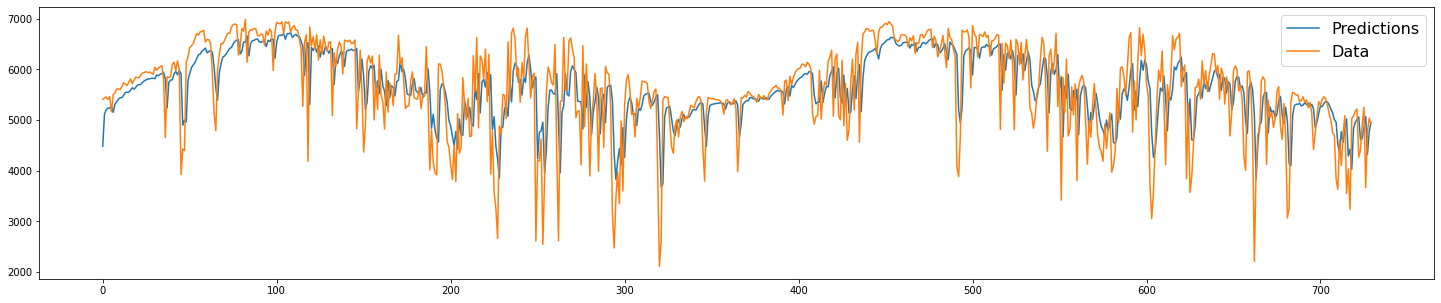

In [ ]:
percentage = []
for i in range(len(predictions)):
  percentage.append((abs(predictions[i]-test_data[train_data_len+i])/(test_data[train_data_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,predictions)
print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictions)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

In [ ]:
modelARMA = ARIMA(daily_AP['GHI'],order=(4,0,5))
fit_modelARMA = modelARMA.fit()
print(fit_modelARMA.summary())
residualsARMA = pd.DataFrame(fit_modelARMA.resid)

                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:                 ARIMA(4, 0, 5)   Log Likelihood              -42095.749
Date:                Sun, 22 Nov 2020   AIC                          84213.499
Time:                        13:29:00   BIC                          84286.186
Sample:                             0   HQIC                         84238.858
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5410.0547    254.406     21.265      0.000    4911.429    5908.681
ar.L1          0.0238      0.405      0.059      0.953      -0.769       0.817
ar.L2          0.5462      0.096      5.717      0.0

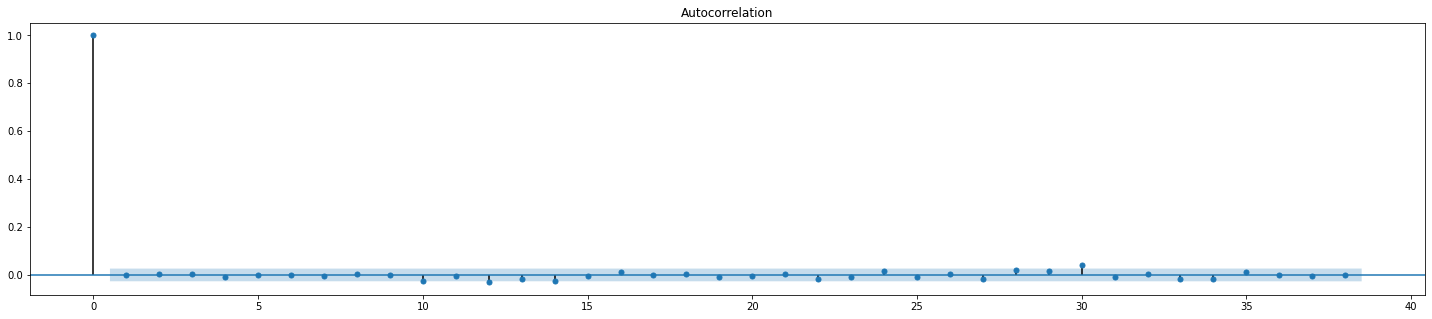

In [ ]:
acf_plot = plot_acf(residualsARMA)

In [ ]:
# ! pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:

print(auto_arima(daily_AP['GHI'],max_p=18,max_q=20))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

 ARIMA(4,0,5)(0,0,0)[0] intercept


Seasonal Testing from here on down

In [ ]:
data = [Rajasthan_data['date_time'],Rajasthan_data['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
temp_df.set_index('date_time',inplace=True)
g = temp_df.groupby(pd.Grouper(freq="M"))
daily_AP=g.sum()
daily_AP.reset_index
daily_AP.head()

,GHI
date_time,
2000-01-31,134061
2000-02-29,141706
2000-03-31,183755
2000-04-30,195353
2000-05-31,202880


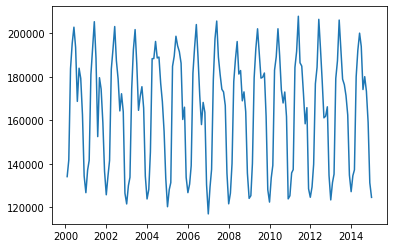

In [ ]:
plt.plot(daily_AP)

In [ ]:
train_data_len = int((len(daily_AP)*13)/15)
train_data = daily_AP['GHI'][0:train_data_len]
test_data = daily_AP['GHI'][train_data_len:len(daily_AP)]
train_data.shape

(156,)

In [ ]:
# from pmdarima.arima import auto_arima
# arima_model = auto_arima(daily_AP['GHI'],seasonal=True,m=12)
# arima_model.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelSARIMA = SARIMAX(daily_AP['GHI'], order = (3,0,3),seasonal_order=(2,0,1,12))
fit_modelSARIMA = modelSARIMA.fit()
print(fit_modelSARIMA.summary())
residualsSARIMA = pd.DataFrame(fit_modelSARIMA.resid)

In [ ]:
acf_plot = plot_acf(resid)

In [ ]:
history = daily_AP['GHI']

predictions = []
for t in range(len(test_data)):
  modelSARIMA = SARIMAX(history[0:train_data_len+t], order = (3,0,3),seasonal_order=(2,0,1,12),enforce_stationarity=False,enforce_invertibility=True)
  model_fit = modelSARIMA.fit()
  output = model_fit.forecast()
  print(output[0])
  predVal = output[0]
  predictions.append(predVal)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


130496.57023598302


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


138178.92315319303


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


180996.50969119402


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


189072.79570359102


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


207248.7555728706
189279.32736109628


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


182145.67428048083


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


166464.7482779923


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


161687.94070443566
165670.26080663683


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


127544.44003150064
124921.27978559236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


130589.64246456884
137795.64641113282


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


177367.71626236098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


186561.9196300634


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


207499.83288909087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


190778.75211344575


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


180249.49838823942


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


167544.66522439523


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


168190.38262126019


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


163694.08854262362
132037.5306414328
126128.6323785194


Mean Absolute Percentage Error: 2.5248329509631766 %
Mean Sqaured Error: 27700121.148013722


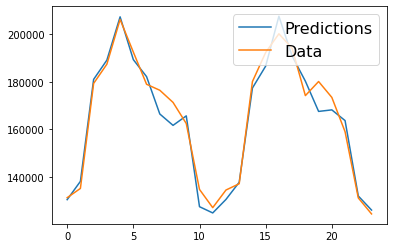

In [ ]:
percentage = []
for i in range(len(predictions)):
  percentage.append((abs(predictions[i]-test_data[+i])/(test_data[i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in test_data]

mse = mean_squared_error(test_points,predictions)
print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictions)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:               ARIMA(12, 1, 10)   Log Likelihood              -44975.902
Date:                Mon, 23 Nov 2020   AIC                          89997.805
Time:                        09:59:24   BIC                          90149.783
Sample:                             0   HQIC                         90050.827
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0515      0.389     -0.133      0.895      -0.814       0.711
ar.L2         -0.1248      0.308     -0.406      0.685      -0.728       0.478
ar.L3          0.2216      0.259      0.855      0.3

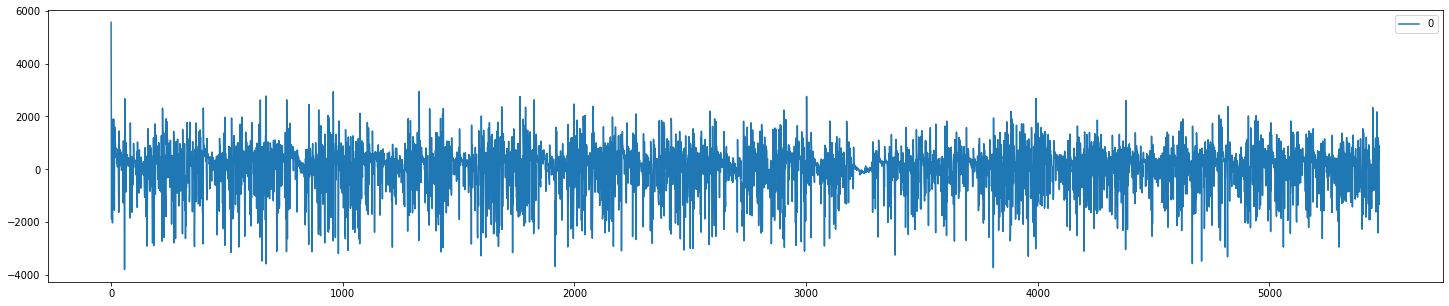

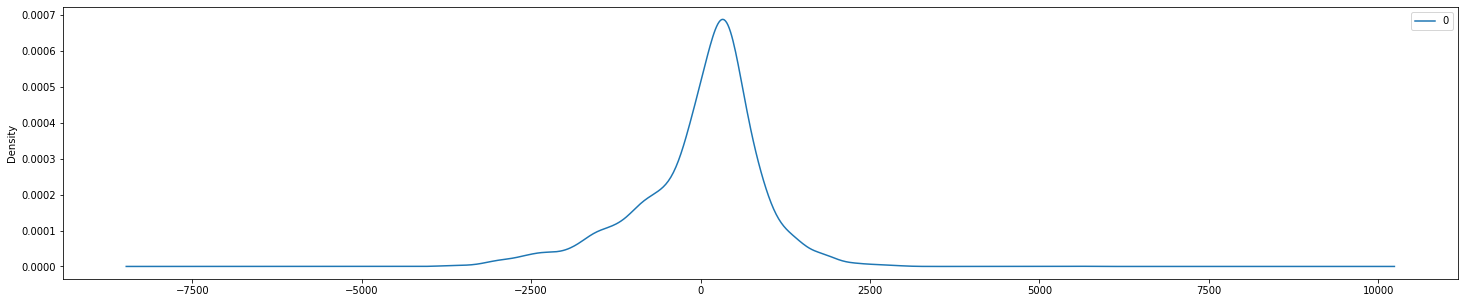

                 0
count  5475.000000
mean      0.565060
std     898.705558
min   -3796.183019
25%    -402.292526
50%     182.204599
75%     523.834662
max    5559.000000


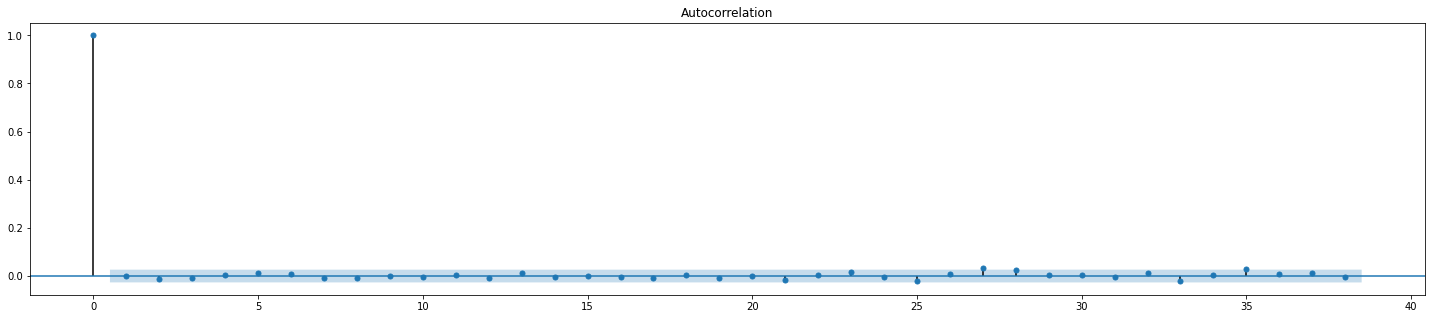

In [ ]:
modelARIMA = ARIMA(daily_TN['GHI'],order=(12,1,10))
fit_modelARIMA = modelARIMA.fit()
print(fit_modelARIMA.summary())
residualsARIMA = pd.DataFrame(fit_modelARIMA.resid)
residualsARIMA.plot()
plt.show()
residualsARIMA.plot(kind='kde')
plt.show()
print(residualsARIMA.describe())
acf_plot = plot_acf(residualsARIMA)

In [ ]:
! pip install statsmodels==0.12

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Finding Forecast Error
percentage = []
for i in range(len(residualsARIMA)):
  # if daily_AP['GHI'][i]==0:
  #   continue
  percentage.append((abs(residualsARIMA[0][i])/(daily_TN['GHI'][i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

Mean Absolute Percentage Error: 10.138676234495971 %
